In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles

In [ ]:
def plotData(X, y):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
  plt.legend()
  plt.xlabel('Feature_1')
  plt.ylabel('Feature_2')
  

In [ ]:
def decisionBoundary(X, est):
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01
  XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  z = est.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=.3)


In [ ]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[0][1]/theta[0][2]
    c = -theta[0][0]/theta[0][2]
    x2 = np.array(x1)*m - c
    
    # Plotting
    fig = plt.figure(figsize=(6,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.plot(x1, x2, 'y-')


## NOT, AND, OR, XOR LOGICAL FUNCTIONS WITH PERCEPTRON ## 
---



In [ ]:
def perceptron(x, w, b):
  a = np.dot(w,x) + b
  return 1 if a >= 0 else 0

In [ ]:
# Exapmles
input1 = np.array([1, 1])
input2 = np.array([1, 0])
input3 = np.array([0, 1])
input4 = np.array([0, 0])

In [ ]:
def NOT(x):
	return perceptron(x, w=-1, b=0.5)

print(f"NOT(0) = {NOT(0)}")
print(f"NOT(1) = {NOT(1)}")

NOT(0) = 1
NOT(1) = 0


In [ ]:
def AND(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

print(f"AND(1, 1) = {AND(input1)}")
print(f"AND(1, 0) = {AND(input2)}")
print(f"AND(0, 1) = {AND(input3)}")
print(f"AND(0, 0) = {AND(input4)}")

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


In [ ]:
def OR(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

print(f"OR(1, 1) = {OR(input1)}")
print(f"OR(1, 0) = {OR(input2)}")
print(f"OR(0, 1) = {OR(input3)}")
print(f"OR(0, 0) = {OR(input4)}")

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


In [ ]:
def XOR(x):
    s_1 = AND(x)
    s_2 = NOT(s_1)
    s_3 = OR(x)
    input = np.array([s_2, s_3])
    output = AND(input)
    return output

print(f"XOR(1, 1) = {XOR(input1)}")
print(f"XOR(1, 0) = {XOR(input2)}")
print(f"XOR(0, 1) = {XOR(input3)}")
print(f"XOR(0, 0) = {XOR(input4)}")

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0


## Linearly Separable Dataset##


(200, 2)
(200,)


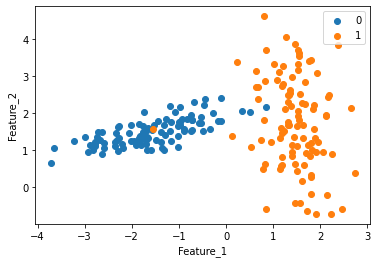

In [ ]:
rs = 0
X, y = make_classification(n_features=2, n_samples=200, n_redundant=0, n_clusters_per_class=1, class_sep=1.5, random_state=rs)
plotData(X, y)
print(X.shape)
print(y.shape)

Accuracy: 97.5%


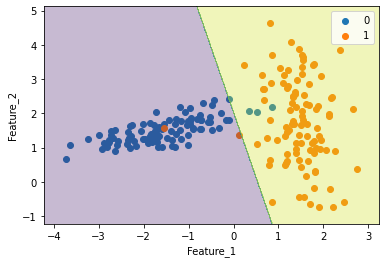

In [ ]:
clf = Perceptron()
clf.fit(X, y)
yp = clf.predict(X)
print(f"Accuracy: {accuracy_score(y, yp) * 100}%")
plotData(X, y)
decisionBoundary(X, clf)

##Basic Perceptron Implementation##

In [ ]:
#prediction Function (activation function)
def pred(sample, weights):
	bias = weights[0][0] * -1
	y_p = bias + np.matmul(sample, weights[0][1:])
	return (y_p >= 0).astype(int)

In [ ]:
def decision(X, weights):
  for x in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
        m = -(-1* weights[0][0]/weights[0][2])/(-1*weights[0][0]/weights[0][1])  
        i = 1*weights[0][0]/weights[0][2]

        #a = bx + c >>>>> b is slope and c is intercept
        Y = m * x + i
        plt.plot(x, Y, 'k.')

(4,)


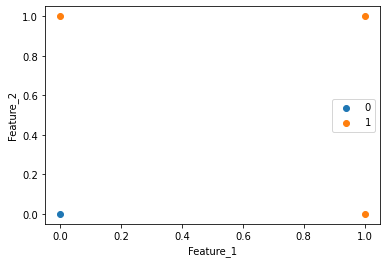

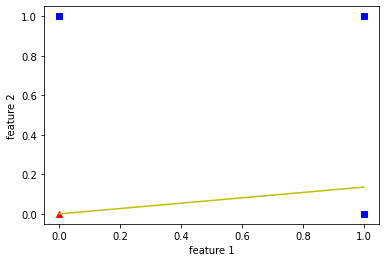

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])
print(y.shape)
plotData(X, y)
plot_decision_boundary(X,weights)
# rs = 28
# X, y = make_classification(n_classes=2, n_features=2, n_samples=10, n_redundant=0, n_clusters_per_class=2, class_sep=0.99, random_state=rs)
# plotData(X, y)

In [ ]:
weights = [[-0.05, -0.02, 0.02]]
yp =[]
for sample, gt in zip(X,y):
  prediction = pred(sample,weights)
  yp.append(prediction)
  print(f"Expected={gt}, Predicted={prediction}")
print(f"{accuracy_score(y, yp)}")

Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
0.75


In [ ]:
def train(X, y, lr, n, step=False):
  n_samples = X.shape[0]
  n_features = X.shape[1]
  weights = [[-0.05, -0.02, 0.02]] #np.random.uniform(low=-5, high=5, size=(1,n_features + 1))
  #b = np.array([[-1]])
  np.set_printoptions(precision=3)
  loss = []
  for epoch in range(n):
    error_sum = 0
    for idx, (sample, gt) in enumerate(zip(X, y)):
      prediction = pred(sample, weights)
      error = prediction - gt
      error_sum += error**2
      weights[0][0] = weights[0][0] - lr * error * (-1)
      weights[0][1:] = weights[0][1:] - lr * error * sample
      #plot_decision_boundary(X,weights)
      #plt.show()
      if idx == len(X) -1:
        loss.append(error_sum)
      if step:
        print(f"epoch={epoch}, step={idx}, lr={lr}, weights= {np.around(weights, decimals=3)}")
    if step==False:
      print(f"epoch={epoch}, lr={lr}, weights= {np.around(weights, decimals=3)}")
    plot_decision_boundary(X,weights)
    plt.show()

  return weights, loss


epoch=0, lr=0.25, weights= [[-0.3    0.2   -0.724]]


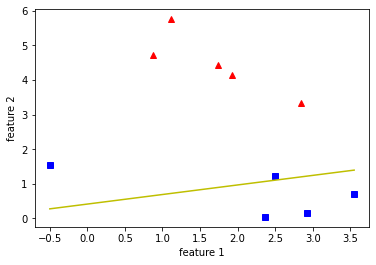

epoch=1, lr=0.25, weights= [[-0.55   0.076 -0.336]]


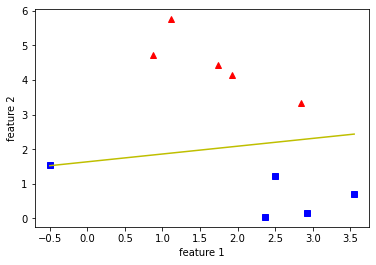

epoch=2, lr=0.25, weights= [[-0.8    0.095 -0.678]]


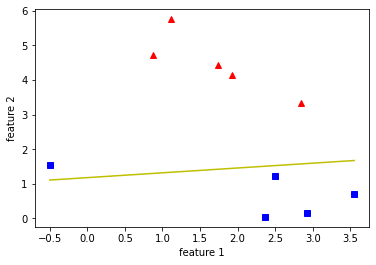

Expected=0, Predicted=0
Expected=1, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
0.9


In [ ]:
weights, loss = train(X, y, 0.25, 3, step=False)
yp =[]
for sample, gt in zip(X,y):
  prediction = pred(sample,weights)
  yp.append(prediction)
  print(f"Expected={gt}, Predicted={prediction}")
print(accuracy_score(y, yp))

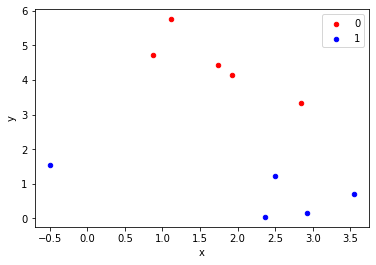

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=10, centers=2, n_features=2,random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])


Accuracy: 100.0%


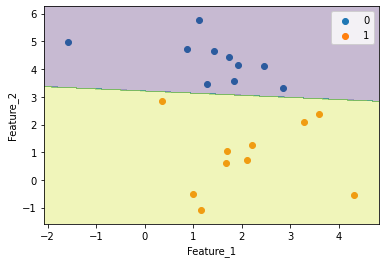

In [ ]:
clf = Perceptron(early_stopping=True,n_iter_no_change=50)
clf.fit(X, y)
yp = clf.predict(X)
print(f"Accuracy: {accuracy_score(y, yp) * 100}%")
plotData(X, y)
decisionBoundary(X, clf)